In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline
sns.set(style="darkgrid")

In [ ]:
# Bir filmin içeriğine (özellikle türlerine) bakarak benzer filmleri öneririz.

In [2]:
movies = pd.read_csv("data/movies.csv") 
ratings = pd.read_csv("data/ratings.csv")

In [3]:
print("Movies:")
print(movies.head())

print("\nRatings:")
print(ratings.head())

Movies:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [4]:
print("Movies Info:")
print(movies.info())

print("\nRatings Info:")
print(ratings.info())

print("\nNull Değer Kontrolü:")
print("Movies:\n", movies.isnull().sum())
print("Ratings:\n", ratings.isnull().sum())

Movies Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None

Ratings Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None

Null Değer Kontrolü:
Movies:
 movieId    0
title      0
genres     0
dtype: int64
Ratings:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


### En çok puan alan filmler

In [6]:
rating_counts = ratings['movieId'].value_counts().head(10)

top_movies = movies[movies['movieId'].isin(rating_counts.index)].copy()
top_movies['rating_count'] = top_movies['movieId'].map(rating_counts)

print(top_movies[['title', 'rating_count']])

                                          title  rating_count
97                            Braveheart (1995)           237
224   Star Wars: Episode IV - A New Hope (1977)           251
257                         Pulp Fiction (1994)           307
277            Shawshank Redemption, The (1994)           317
314                         Forrest Gump (1994)           329
418                        Jurassic Park (1993)           238
461                     Schindler's List (1993)           220
507           Terminator 2: Judgment Day (1991)           224
510            Silence of the Lambs, The (1991)           279
1939                         Matrix, The (1999)           278


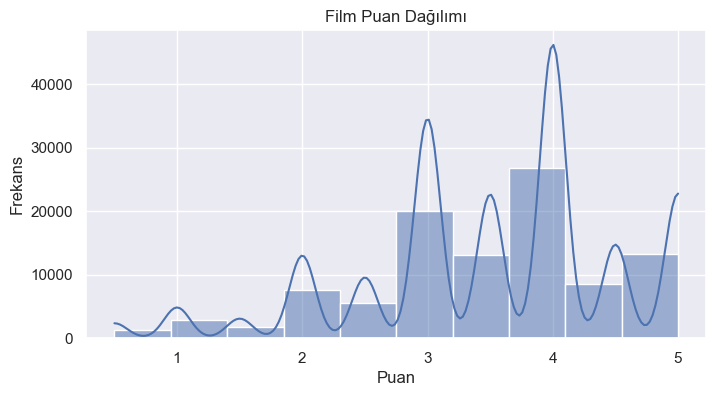

In [7]:
plt.figure(figsize=(8, 4))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title("Film Puan Dağılımı")
plt.xlabel("Puan")
plt.ylabel("Frekans")
plt.show()

In [8]:
movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))
movies[['title', 'genres']].head()

,title,genres
0,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,Grumpier Old Men (1995),"[Comedy, Romance]"
3,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,Father of the Bride Part II (1995),[Comedy]


In [9]:
movies['genres_str'] = movies['genres'].apply(lambda x: ' '.join(x))
print(movies[['title', 'genres_str']].head())

                                title  \
0                    Toy Story (1995)   
1                      Jumanji (1995)   
2             Grumpier Old Men (1995)   
3            Waiting to Exhale (1995)   
4  Father of the Bride Part II (1995)   

                                    genres_str  
0  Adventure Animation Children Comedy Fantasy  
1                   Adventure Children Fantasy  
2                               Comedy Romance  
3                         Comedy Drama Romance  
4                                       Comedy  


In [10]:
# TF-IDF ile tür bilgilerini sayısal vektörlere çeviririz
tf_idf = TfidfVectorizer()
tf_idf_matrix = tf_idf.fit_transform(movies['genres_str'])

print("TF-IDF matrix shape:", tf_idf_matrix.shape)

TF-IDF matrix shape: (9742, 24)


In [11]:
# Benzerlik matrisi
# Her film arasındaki benzerliği hesaplarız.
cosine_sim = cosine_similarity(tf_idf_matrix, tf_idf_matrix)

In [ ]:
# Belirli bir film adına göre en benzer filmleri önerir : 

In [12]:
indices = pd.Series(movies.index, index=movies['title']) 

def recommend(title, cosine_sim=cosine_sim, top_n=5):  # öneri fonksiyonu
    idx = indices[title]  # Kullanıcının girdiği film adına karşılık gelen satır indeksini bulur
    sim_scores = list(enumerate(cosine_sim[idx]))  # Girilen filmle diğer tüm filmler arasındaki benzerlik skorlarını alır
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) # Film benzerlik skorlarını sıralar
    sim_scores = sim_scores[1:top_n+1]   # İlk filmi kendisi, onu atlayıp ilk N öneriyi alır
    movie_indices = [i[0] for i in sim_scores] # Önerilen filmlerin indexleridir

    return movies['title'].iloc[movie_indices]

In [13]:
recommend("Jumanji (1995)")

53             Indian in the Cupboard, The (1995)
109             NeverEnding Story III, The (1994)
767               Escape to Witch Mountain (1975)
1514    Darby O'Gill and the Little People (1959)
1556                          Return to Oz (1985)
Name: title, dtype: object